In [1]:
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('weatherHistory.csv') # Filepath
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Finding all the column names
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
# To see all the columns description
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
# Finding the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
# Finding the shape of the dataset
data.shape

(96453, 12)

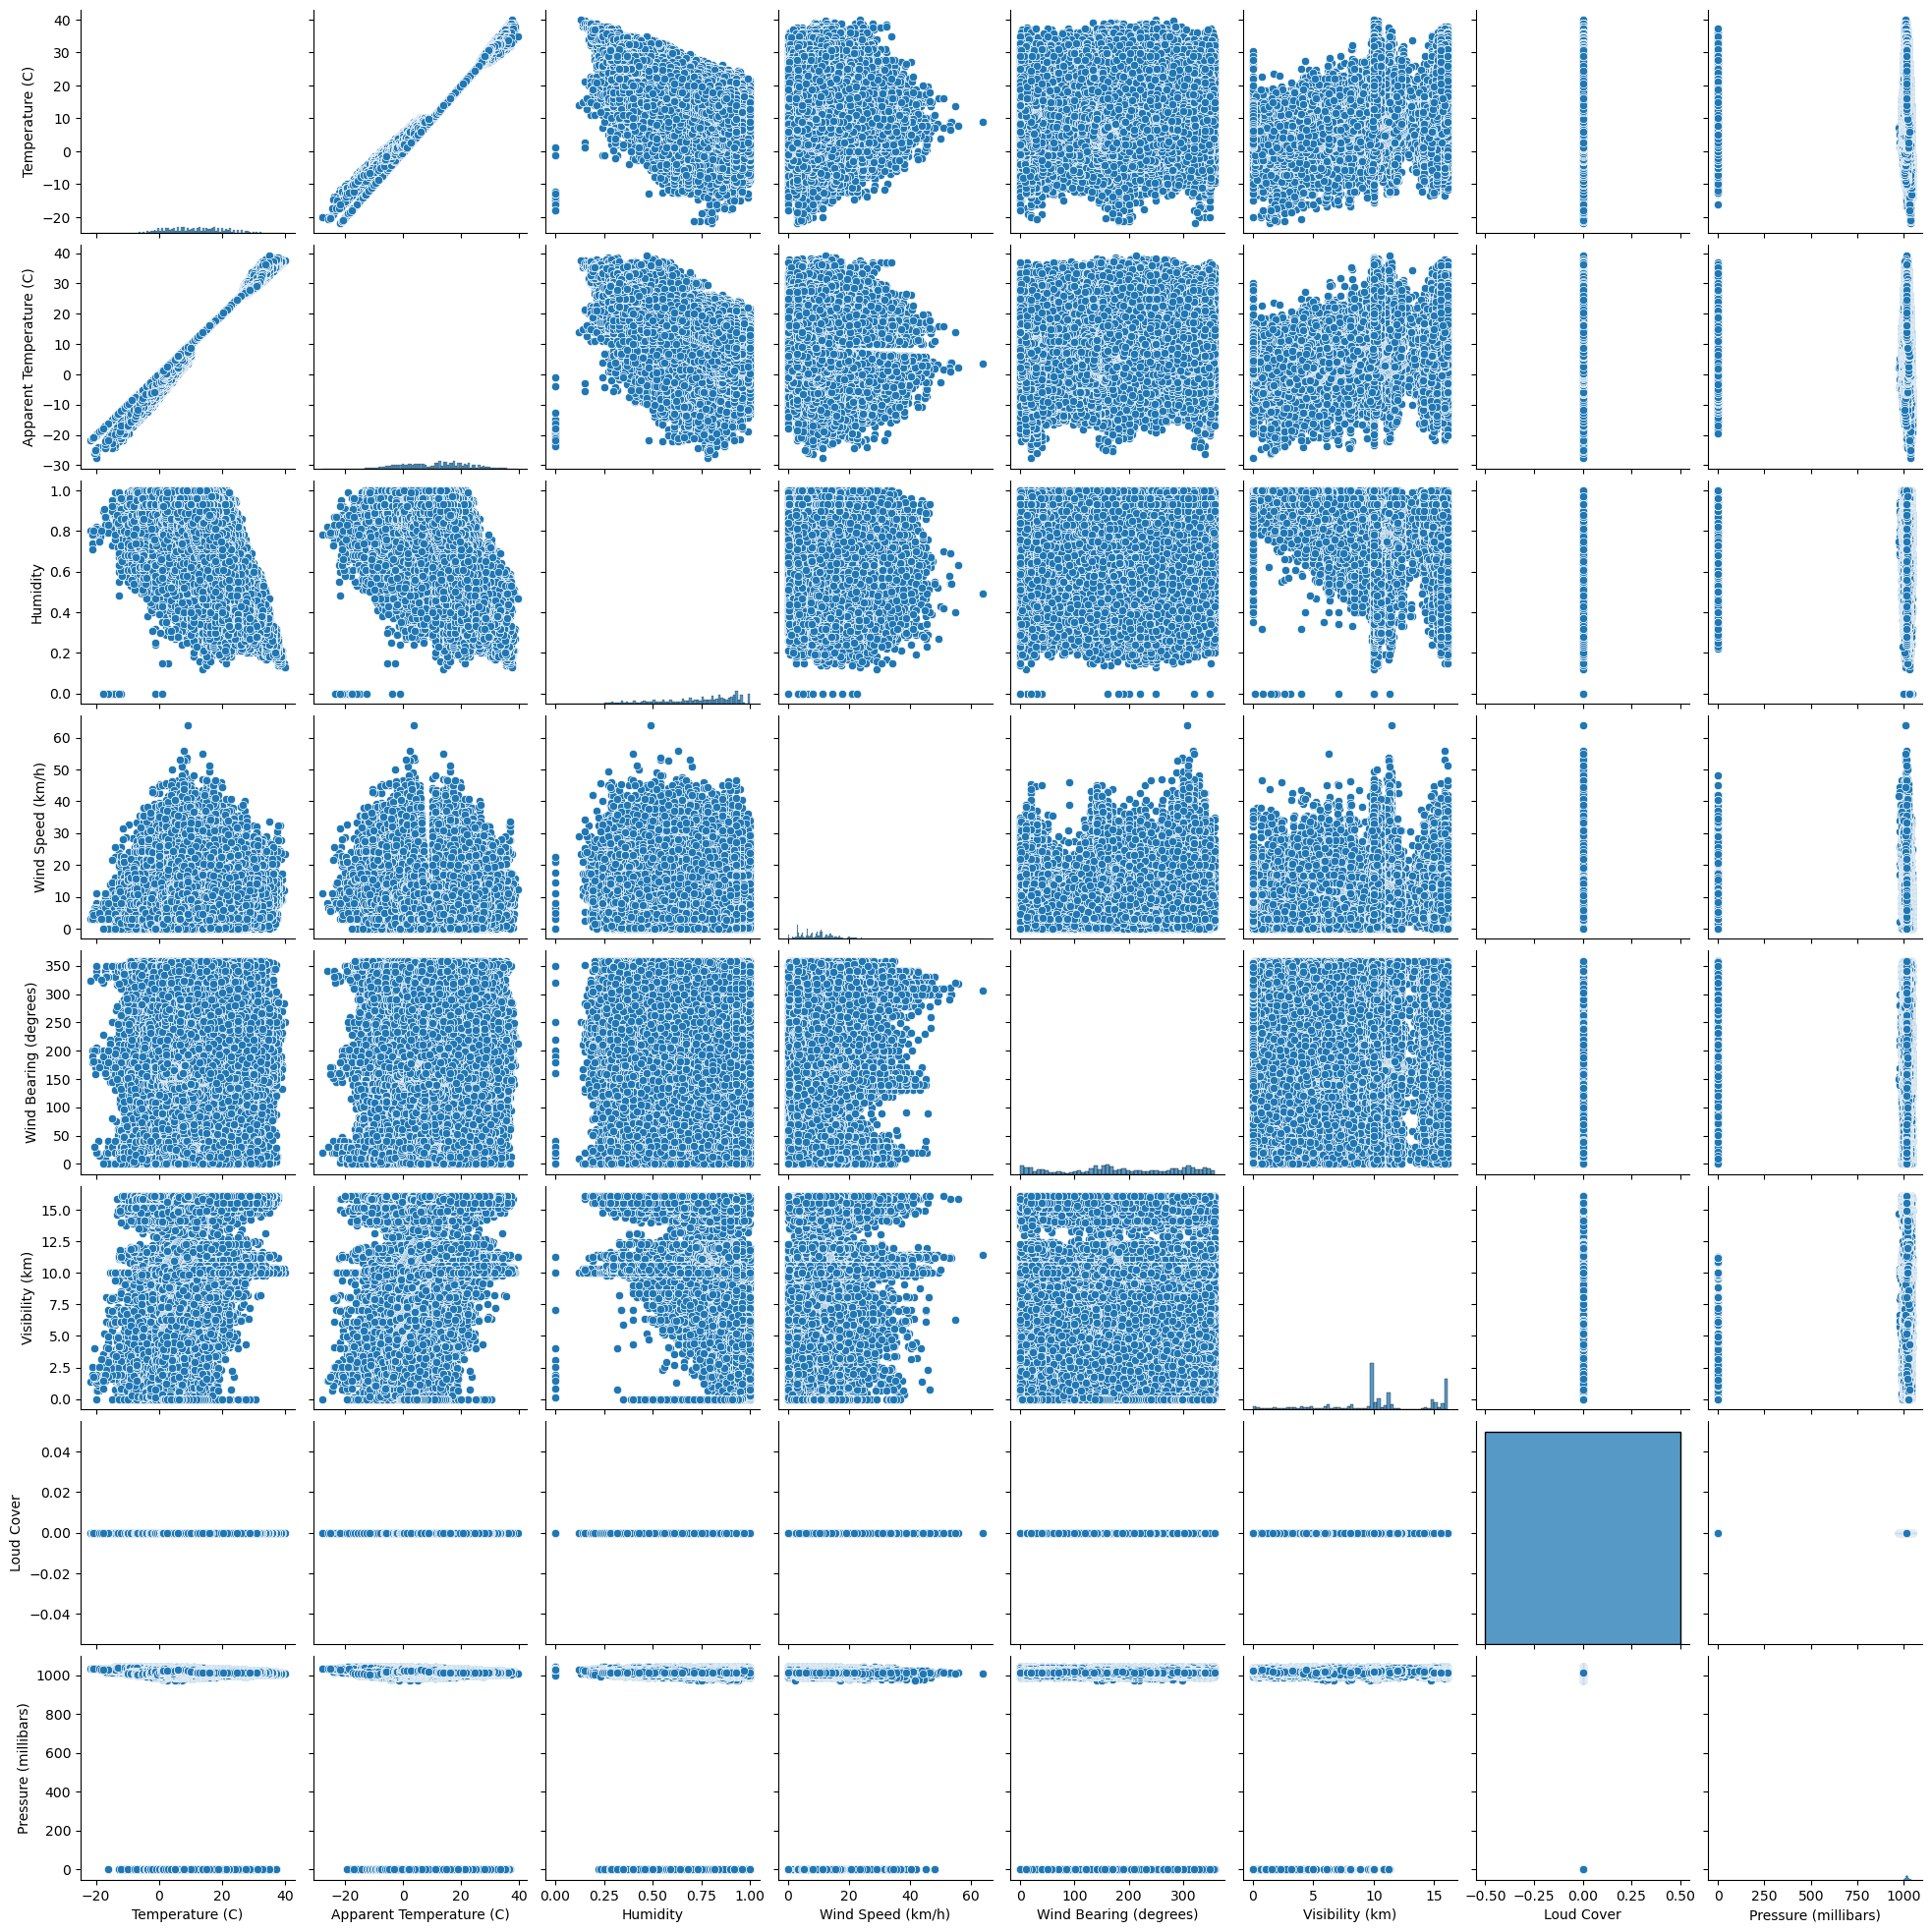

In [7]:
# To visualize the column relations with each other column, we can use pairplot to see that.
sns.pairplot(data)

<AxesSubplot:xlabel='count', ylabel='Summary'>

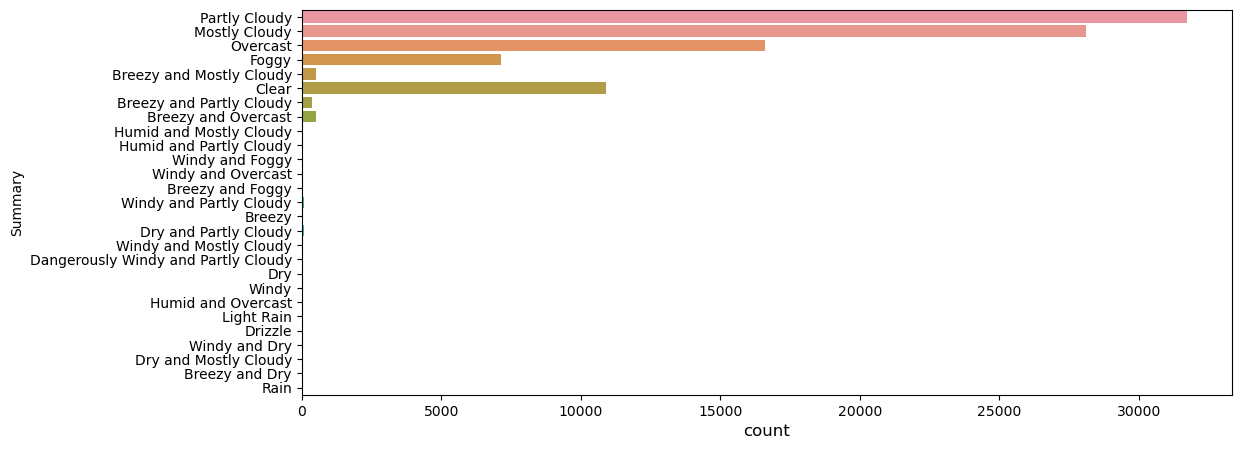

In [8]:
# To visualize the number of values in  summary column
plt.figure(figsize=(12,5))
plt.xlabel('Year', fontsize=12)
sns.countplot(y=data['Summary'])

In [9]:
# Dropping these columns like formatted date and Loud Cover as date column is not necessary in predicting the target 
#loud cover has the same value 0.0 in all the rows.
data.drop(['Loud Cover','Formatted Date'],axis=1,inplace=True)

In [10]:
data.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
# Checking the null values in all the columns
data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [12]:
#From the above code we can see that precip type column has 517 null values among 95k records which is less. So we can use 
# use any existing methods like ffill or bfill or mean function to replace the values.
data['Precip Type'].fillna(method='ffill',inplace=True,axis=0)

In [13]:
# After filling the values if we check the null values again
data.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [14]:
# As machine learning models only deal with numerical data so we are going to replace all the categorical features to
# numerical values. In our dataset, we have three columns 'precip type','Summary','Daily Summary' which needs to replaced
# by the numerical values. For this we are using 'LabelEncoder' package for encoding purpose.
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data['Precip Type']=l.fit_transform(data['Precip Type'])
data['Summary']=l.fit_transform(data['Summary'])
data['Daily Summary']=l.fit_transform(data['Daily Summary'])

In [15]:
data.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197


In [16]:
# As we can see there are only two values present in the target which is rain and snow and it is converted to numerica
# values in which 'rain' is represented as '0' and 'snow' is represented as '1'. We can clearly see that the dataset is
#imbalanced as majority of the records belongs to one category. But before balancing the dataset we would like to see
# how our model is performing on the imbalanced dataset.
data['Precip Type'].value_counts()

0    85741
1    10712
Name: Precip Type, dtype: int64

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

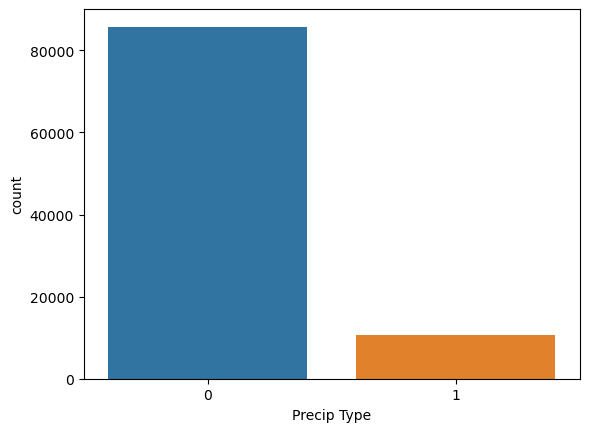

In [17]:
# plotting the bar graph for precip type column. From the below graph we can visualize the amount of records present
# in the dataset. Here 0 indicates rain and 1 indicates snow.
sns.countplot(x=data['Precip Type'])

In [18]:
# We want to find which columns are actually necessary for predicting the target column. Having more number of features will
# decrease the model performance which is called Curse of Dimensionality. 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(data, 0.9)
len(set(corr_features))

1

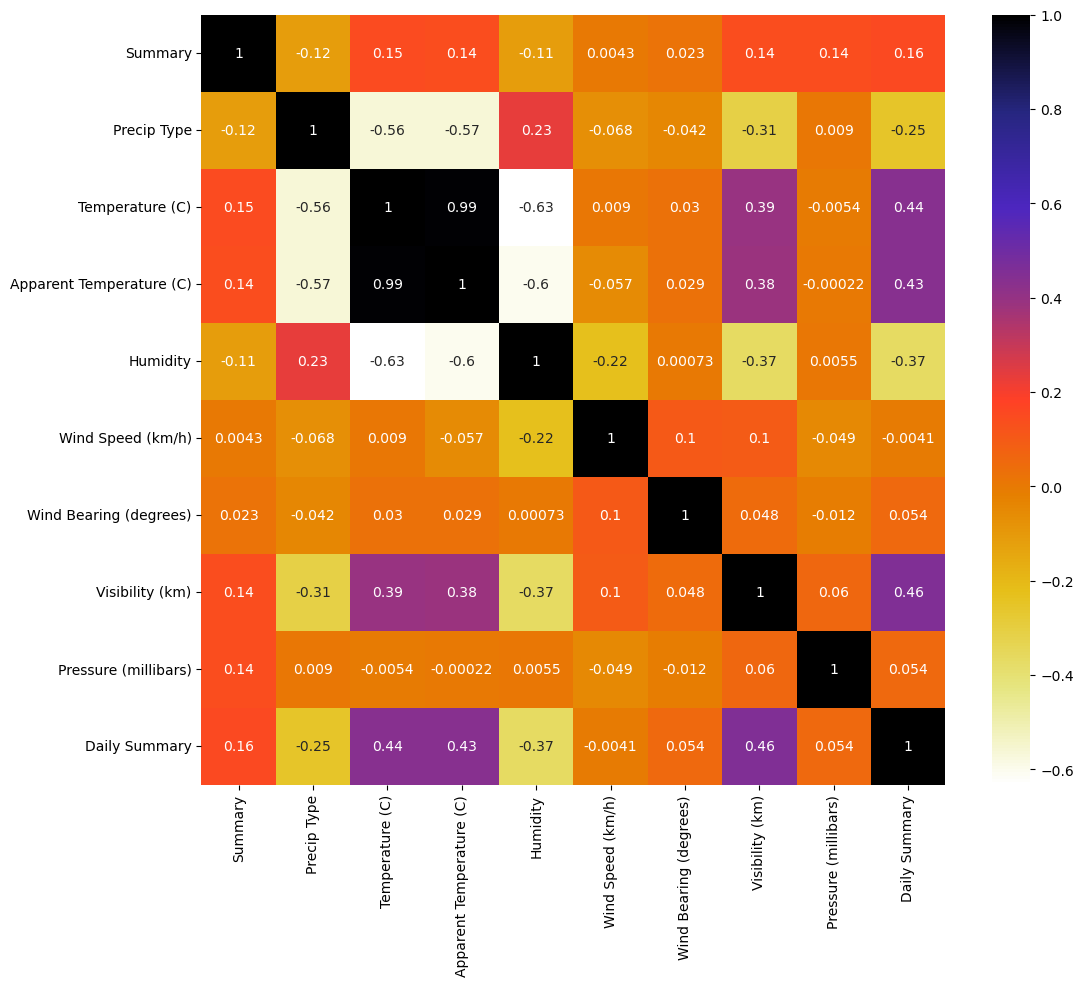

In [20]:

plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
# printing the features 
print(corr_features)

{'Apparent Temperature (C)'}


In [22]:
data.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197


In [23]:
# After performing feature selection we can see that only the column apparent temperature is highly correlated with temperature.
# So we are going to remove the column 'Apparent Temperature'
X=data.iloc[:,[0,2,4,5,6,7,8,9]]
X

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,19,9.472222,0.89,14.1197,251.0,15.8263,1015.13,197
1,19,9.355556,0.86,14.2646,259.0,15.8263,1015.63,197
2,17,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,19,8.288889,0.83,14.1036,269.0,15.8263,1016.41,197
4,17,8.755556,0.83,11.0446,259.0,15.8263,1016.51,197
...,...,...,...,...,...,...,...,...
96448,19,26.016667,0.43,10.9963,31.0,16.1000,1014.36,170
96449,19,24.583333,0.48,10.0947,20.0,15.5526,1015.16,170
96450,19,22.038889,0.56,8.9838,30.0,16.1000,1015.66,170
96451,19,21.522222,0.60,10.5294,20.0,16.1000,1015.95,170


In [24]:
y=data.iloc[:,1]


In [25]:
# Now splitting the model in to training and testing datasets.
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(
    X,y,test_size=0.3,random_state=100
)

print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(67517, 8) (28936, 8) (67517,) (28936,)


In [26]:
# We started with Logistic Regression model first because it gives good results for binarly classification. So people who
# generally start with machine learning models for binary classification prefer to start with Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("Confusion Matrix")
Imbalanced_LR = confusion_matrix(y_pred,y_test)
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))



Before making the dataset balanced :
Accuracy Score : 0.9985139618468344
Confusion Matrix
[[25776     0]
 [   43  3117]]
Recall Score
1.0
Precision Score
0.9863924050632912
F1 Score
0.9931495937549785


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# We are trying one more model just to see the performance for the dataset eventhough Logistic Regression gave the highest
# accuracy. If we see the GaussianNB we can see the accuracy is not as good as Logistic regression.

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
  
from sklearn import metrics
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))

Before making the dataset balanced :
Accuracy Score : 0.9259745645562621
Confusion Matrix
[[24380   703]
 [ 1439  2414]]
Recall Score
0.7744626243182547
Precision Score
0.6265247858811316
F1 Score
0.6926829268292684


As we are getting the highest accuracy we suspected that it is due to the imbalanced dataset. So we want to balance the dataset first and then apply these models to the dataset. There are two techniques for balancing the dataset 'OverSampling' and 'UnderSampling'. In Oversampling we are going to increase the minority class that will be equal to majority class whereas in UnderSampling we are going to decrease the majority class that is equal to the minority class. Generally data loss happens in Undersampling so our opinion is Oversampling is always good idea as no data will be lost. But we would like to test our dataset in both ways and compare the results.

In [28]:
# OverSampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 85741, 1: 10712})
Resample dataset shape Counter({0: 85741, 1: 85741})


<AxesSubplot:xlabel='Precip Type', ylabel='count'>

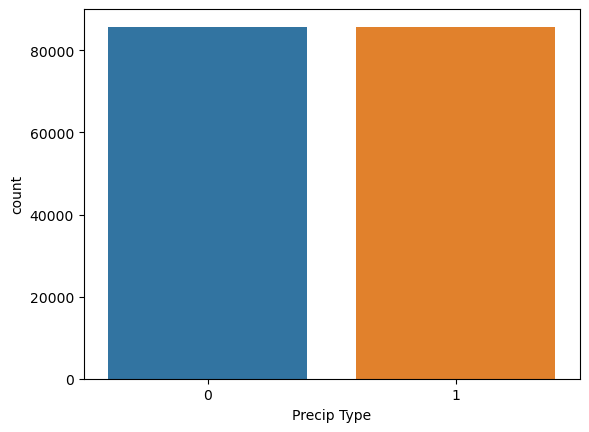

In [29]:
# plotting the graph to see whether both categories 'rain' and 'snow' are equal. Here 0 indicates rain and 1 indicates snow.
sns.countplot(x=y_ros)

In [30]:
# Now after oversampling splitting the data in to train and test
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(
  x_ros, y_ros,test_size=0.3,random_state=100
)

print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(120037, 8) (51445, 8) (120037,) (51445,)


In [31]:
# Following the same model Logistic regression and Naive Bayes to see the performance.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
OverSampling_LR = confusion_matrix(y_pred,y_test)
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))

Before making the dataset balanced :
Accuracy Score : 0.9971814559238021
Confusion Matrix
[[25518     0]
 [  145 25782]]
Recall Score
1.0
Precision Score
0.9944073745516258
F1 Score
0.997195845984258


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
  
from sklearn import metrics
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))

Before making the dataset balanced :
Accuracy Score : 0.9158713188842453
Confusion Matrix
[[22841  1506]
 [ 2822 24276]]
Recall Score
0.9415871538282523
Precision Score
0.8958594730238394
F1 Score
0.9181543116490167


After Oversampling we can see that still Logistic Regression is giving the highest accuraacy compared to Naive Bayes. Even after Oversampling Logistic Regression is performing good. Now the next step is Undersampling. So we are going to follow the same steps that we have done previously for Oversampling.

In [33]:
from imblearn.under_sampling import RandomUnderSampler 
rs = RandomUnderSampler()

#print('Original dataset shape %s' % Counter(y))

X_res, y_res = rs.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_res))

After undersample dataset shape Counter({0: 10712, 1: 10712})
Original dataset shape Counter({0: 85741, 1: 10712})
Resample dataset shape Counter({0: 10712, 1: 10712})


<AxesSubplot:xlabel='Precip Type', ylabel='count'>

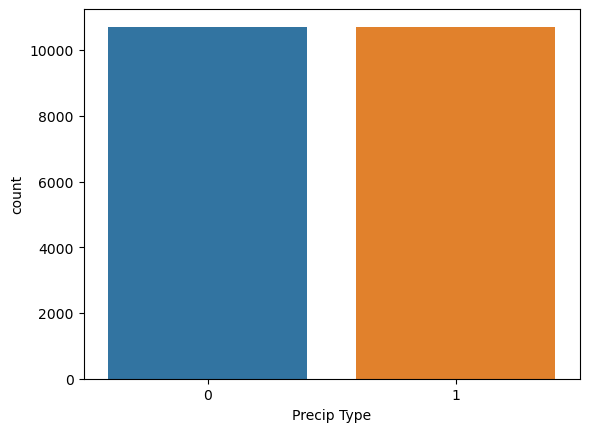

In [34]:
# plotting the graph to see whether both categories 'rain' and 'snow' are equal. Here 0 indicates rain and 1 indicates
#snow. The below graph shows us the equal number of records after UnderSampling.
sns.countplot(x=y_res)

In [35]:
# Now we are going to split the data in to training and testing
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(
  X_res, y_res,test_size=0.3,random_state=100
)

print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(14996, 8) (6428, 8) (14996,) (6428,)


In [41]:
## Following the same model Logistic regression and Naive Bayes to see the performance.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
Undersampling_LR = confusion_matrix(y_pred,y_test)
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))

Before making the dataset balanced :
Accuracy Score : 0.996110765401369
Confusion Matrix
[[3237    0]
 [  25 3166]]
Recall Score
1.0
Precision Score
0.992165465371357
F1 Score
0.9960673273556709


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
  
from sklearn import metrics
print("Before making the dataset balanced :")
print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Recall Score")
print(recall_score(y_test,y_pred))
print("Precision Score")
print(precision_score(y_test,y_pred))
print("F1 Score")
print(f1_score(y_test,y_pred))

Before making the dataset balanced :
Accuracy Score : 0.909769757311761
Confusion Matrix
[[2865  183]
 [ 397 2983]]
Recall Score
0.9421983575489576
Precision Score
0.8825443786982249
F1 Score
0.9113962725328445


Now we are going to show the confusion matrix before balancing the dataset and after balancing the dataset with the help of Oversampling and Undersampling

Confusion Matrix before balancing the dataset :


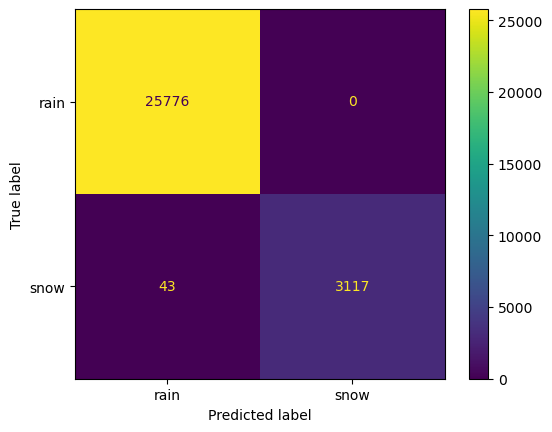

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix before balancing the dataset :")
cmd=ConfusionMatrixDisplay(Imbalanced_LR, display_labels=['rain','snow'])
cmd.plot()

Confusion Matrix after OverSampling :


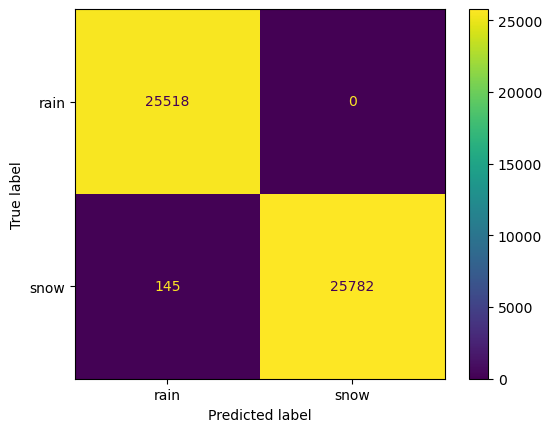

In [38]:
print("Confusion Matrix after OverSampling :")
cmd=ConfusionMatrixDisplay(OverSampling_LR, display_labels=['rain','snow'])
cmd.plot()

Confustion Matrix after UnderSampling :


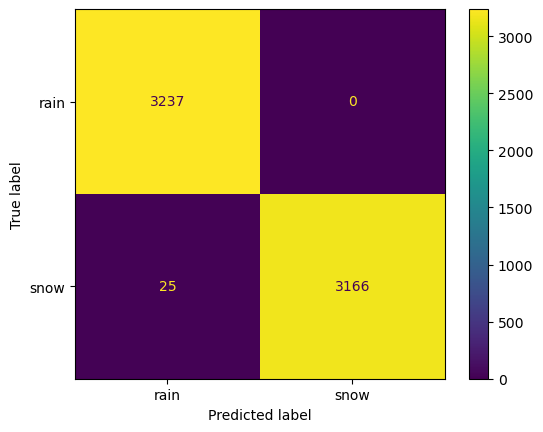

In [42]:
print("Confustion Matrix after UnderSampling :")
cmd=ConfusionMatrixDisplay(Undersampling_LR, display_labels=['rain','snow'])
cmd.plot()